# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


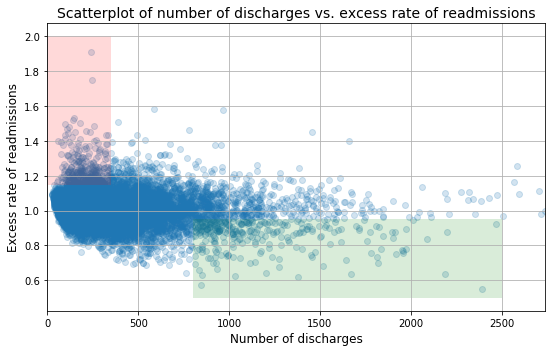

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

# Question 1: Do you agree with the above analysis and recommendations? Why or why not?

I agree with the initial observations made. However, the statistics and conclusions are unfounded with the information provided. This analysis is based solely on the graph and does not provide appropriate statistical testing of hypotheses. As a result, I do not agree with the overall analysis and recommendations unless proven otherwise with statistical analysis.

# Question 2: Provide support for your arguments and your own recommendations with a statistically sound analysis:

a. Setup an appropriate hypothesis test.

    H0 : There is no significant correlation between number of discharges and readmissions.

    H1 : There is significant correlation between number of discharges and readmissions.

b. Compute and report the observed significance value (or p-value).

c. Report statistical significance for  α  = .01.

d. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to     the client?

e. Look at the scatterplot above.

    What are the advantages and disadvantages of using this plot to convey information?
    
    Construct another plot that conveys the same information in a more direct manner.

In [10]:
#compute and report observed significant value
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [6]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
df = clean_hospital_read_df.drop('Footnote',axis=1).dropna(axis=0, how='any')[['Number of Discharges', 'Excess Readmission Ratio']]

In [9]:
df.corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


The observed correlation between number of discharges and excess readmission ratio = -0.097398

In [18]:
#import package
from scipy import stats
from scipy.stats import pearsonr

#calculate pearson correlation and p value
n_dis = df['Number of Discharges'].iloc[:-3]
r_r = df['Excess Readmission Ratio'].iloc[:-3]
pear_r, p_value = stats.pearsonr(n_dis, r_r)
print('Pearson coefficient is:', pear_r)
print('p value is:', p_value)

Pearson coefficient is: -0.09309554287590441
p value is: 1.5022756426464526e-23


In [19]:
#Report statistical significance for α = .01
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(df)

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,0,0
Excess Readmission Ratio,0,0


In [21]:
#bootstrapping calculation of the Pearson correlation coefficient. 

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(n_dis,r_r)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute discharges: n_dis_permuted
    n_dis_permuted = np.random.permutation(n_dis)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(n_dis_permuted, r_r)

# Compute p-value: p
p = np.sum(perm_replicates<r_obs) / len(perm_replicates)

print('Pearson coefficient is:', r_obs)
print('p value is:', p)

Pearson coefficient is: -0.09309554287590442
p value is: 0.0


With a p value < 0.1 we can reject the null hypothesis and conclude that there is a significant correlation between number of discharges and readmissions.

With a negative pearson coefficient, we see a negative correlation. This indicates that as the number of discharges increases, the number of readmission decreases.

# Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?


Statistical significance takes into account change and variability. Statistical significance was computed for the hypothesis test above. Practical significance focuses on whether the difference between two variables matters to the real world. If we look at the actual value of the Pearson correlation coefficent: -0.093. We know the coefficient means little correlation when it is zero and perfect correlation when it is +1 or -1. Since our coefficent is so close to zero, this indicates that the correlation might not be practically significant although it was statistically significant enough for us to reject our null hypothesis.

Practically, this changes the recommendations to the client. The preliminary report suggests consolidating smaller hospitals; however, it did not have any practically significant evidence to back it up. Smaller medical facilities may provide needs and quicker services to specific illnesses that larger hospitals may not. It would not be wise to suggest consolidation based on the current study.

# Question 5

Advantage of the scatterplot: Clearly labeled. The color strips directs readers to focus on mentioned areas. 

Disadvantage of the scatterplot: too many data points in some areas. no clear trend.

Since we're focused on correlation between two variables, I used a scatter plot. I increased the alpha value and decreased the dot size to show the density contrast. A regression line was plotted in the same figure to give a general direction of correlation. This conveys the same message but in a clearer way.

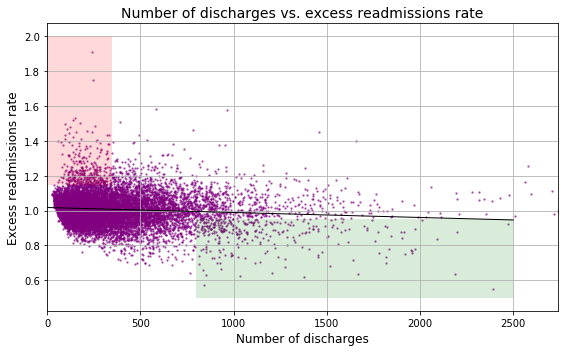

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=n_dis, y=r_r,s=2, c='purple', alpha=0.5)

slope, intercept =np.polyfit(n_dis, r_r, 1)

x_1 = np.array([0,2500])
y_1 = x_1*slope+intercept

ax.plot(x_1, y_1, color='black', linewidth=1)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)



ax.set_xlim([0, max(n_dis)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess readmissions rate', fontsize=12)
ax.set_title('Number of discharges vs. excess readmissions rate', fontsize=14)

ax.grid(True)
fig.tight_layout()